### Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.  
https://archive.ics.uci.edu/ml/datasets/South+German+Credit

In [3]:
# impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# reading the dataset
data = pd.read_csv('South German Credit/data/SouthGermanCredit.asc',sep=" ")
data.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


In [5]:
# renaming the columns name from german to english
data.columns = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration',
                'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age',
                'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
                'credit_risk']

In [6]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [7]:
len(data.columns)

21

In [8]:
# shape of the data
data.shape 

(1000, 21)

In [9]:
data_copy = data.copy()

### Assigning the appropriate labels to the data for each features

In [10]:
# assigning the appropriate categories labels to the data of each feature
data_copy['status'].replace(to_replace=[1,2,3,4],
                            value=["no checking account","..<0 DM","0<=..<200 DM","..>= 200 DM/salary for at least 1 year"],
                            inplace=True)

data_copy['credit_history'].replace(to_replace=[0,1,2,3,4],
                                    value=["delay in paying off in the past","critical account/other credits elsewhere",
                                           "no credits taken/all credits paid back duly","existing credits paid back duly till now",
                                           "all credits at this bank paid back duly"],inplace=True)

data_copy['purpose'].replace(to_replace=[0,1,2,3,4,5,6,7,8,9,10],
                             value=["others","car (new)","car (used)","furniture/equipment","radio/television",
                                     "domestic appliances","repairs","education","vacation","retraining","business"],inplace=True)

data_copy['savings'].replace(to_replace=[1,2,3,4,5],
                            value=["unknown/no savings account","..<100 DM", "100<=..<500 DM",
                                   "500<=..<1000 DM","..>=1000 DM"],inplace=True)

data_copy['other_debtors'].replace(to_replace=[1,2,3],value=["None","co-applicant","guarantor"],inplace=True)

data_copy['personal_status_sex'].replace(to_replace=[1,2,3,4],
                                        value=["male : divorced/separated","female : non-single or male : single",
                                               "male : married/widowed","female : single"],inplace=True)

data_copy['installment_rate'].replace(to_replace=[1,2,3,4],value=[">=35","25<=..<35","20<=..<25","<20"],inplace=True)

data_copy['present_residence'].replace(to_replace=[1,2,3,4],
                                       value=["<1 yr","1<=..<4 yrs","4<=..<7 yrs",">=7 yrs"], inplace=True)

data_copy['property'].replace(to_replace=[1,2,3,4],
                             value=["unknown / no property","car or other","building soc. savings agr./life insurance",
                                    "real estate"],inplace=True)

data_copy['other_installment_plans'].replace(to_replace=[1,2,3],value=["bank","stores","none"],inplace=True)

data_copy['housing'].replace(to_replace=[1,2,3],value=["for free","rent","own"],inplace=True)

data_copy['number_credits'].replace(to_replace=[1,2,3,4],value=["1", "2-3", "4-5", ">= 6"],inplace=True)

data_copy['job'].replace(to_replace=[1,2,3,4],
                        value=["unemployed/unskilled - non-resident","unskilled - resident",
                               "skilled employee/official","manager/self-empl./highly qualif. employee"],inplace=True)

data_copy['employment_duration'].replace(to_replace=[1,2,3,4,5],
                                        value=["unemployed", "<1 yr", "1<=..<4 yrs","4<=..<7 yrs", ">=7 yrs"], inplace=True)

data_copy['people_liable'].replace(to_replace=[1,2],value=["3 or more", "0 to 2"],inplace=True)

data_copy['telephone'].replace(to_replace=[1,2],value=["No", "Yes"],inplace=True)

data_copy['foreign_worker'].replace(to_replace=[1,2],value=["yes", "no"],inplace=True)

In [11]:
data_copy.info() # general information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [12]:
data_copy.describe() # Descprition of data

,duration,amount,age,credit_risk
count,1000.000000,1000.00000,1000.00000,1000.000000
mean,20.903000,3271.24800,35.54200,0.700000
std,12.058814,2822.75176,11.35267,0.458487
min,4.000000,250.00000,19.00000,0.000000
25%,12.000000,1365.50000,27.00000,0.000000
50%,18.000000,2319.50000,33.00000,1.000000
75%,24.000000,3972.25000,42.00000,1.000000
max,72.000000,18424.00000,75.00000,1.000000


In [13]:
# checking if any missing values in the data
data_copy.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

<AxesSubplot:xlabel='credit_risk', ylabel='count'>

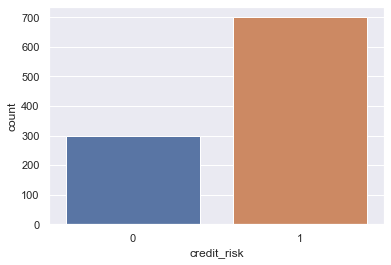

In [14]:
# count of particular class 0-> not risk, 1->risk
sns.countplot(x='credit_risk',data=data_copy)

### From abve graph it is clear that the data is highly imblanced

In [15]:
# defining the categorial columns
categorical_col = ['status', 'credit_history', 'purpose', 'savings','installment_rate', 'employment_duration',
                   'personal_status_sex', 'other_debtors', 'present_residence', 'property','other_installment_plans', 
                   'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

In [16]:
# defining the numerical columns
num_col = ['duration', 'amount', 'age']

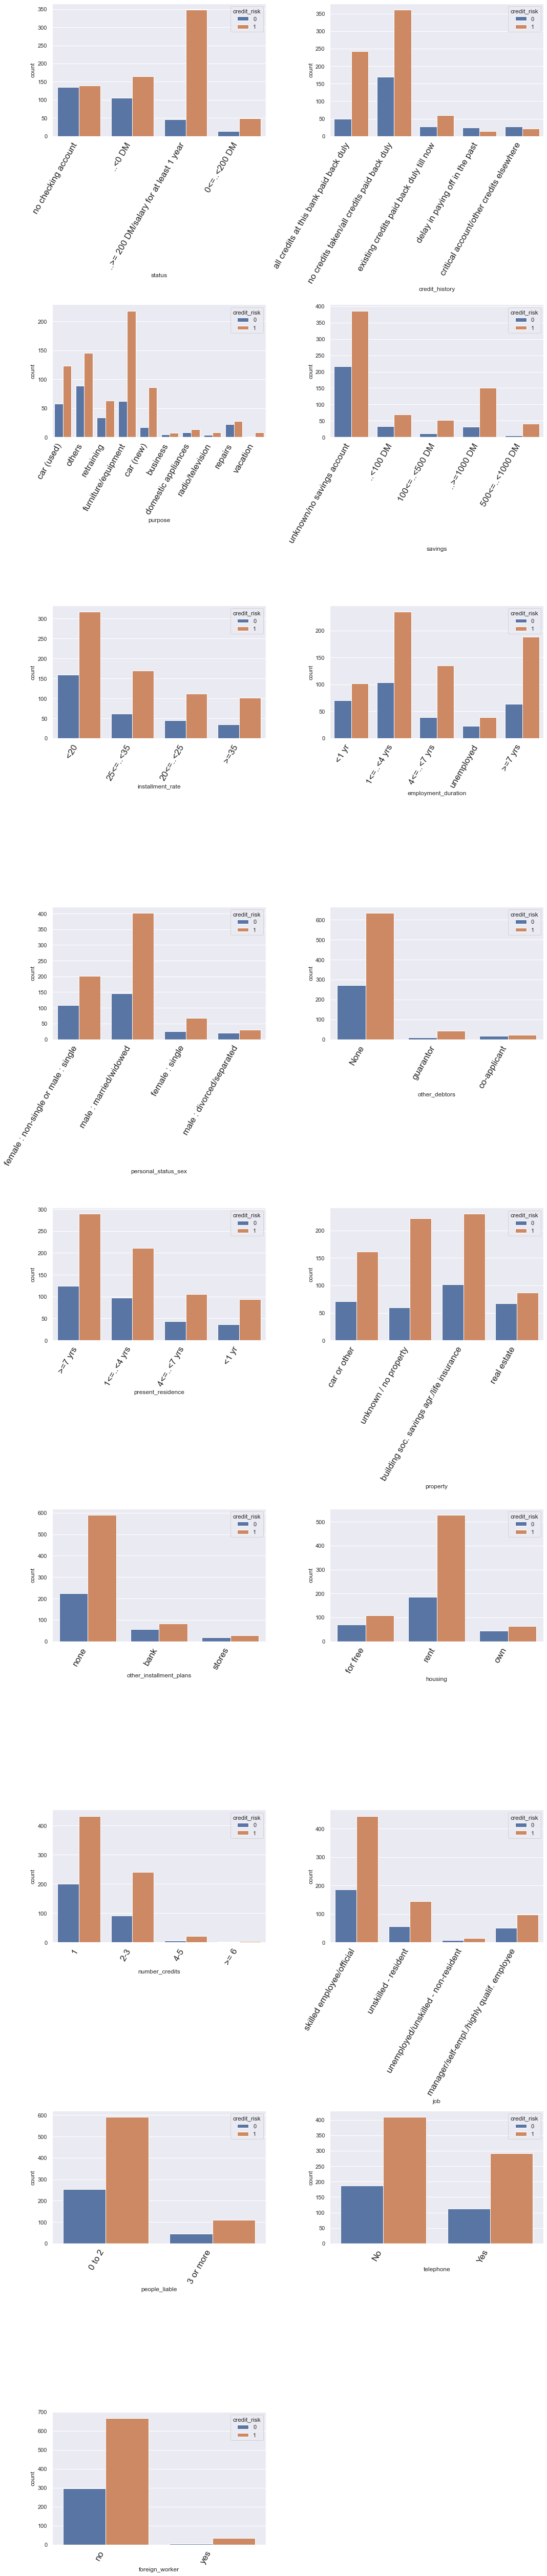

In [17]:
# visualizing the categrial data against target feature
plt.figure(figsize=(15, 70))
i = 1
for col in categorical_col:
    plt.subplot(9,2,i)
    sns.countplot(x=col,hue='credit_risk',data=data_copy)
    plt.xticks(rotation=60,horizontalalignment='right',fontsize='x-large')
    plt.tight_layout()
    i+=1

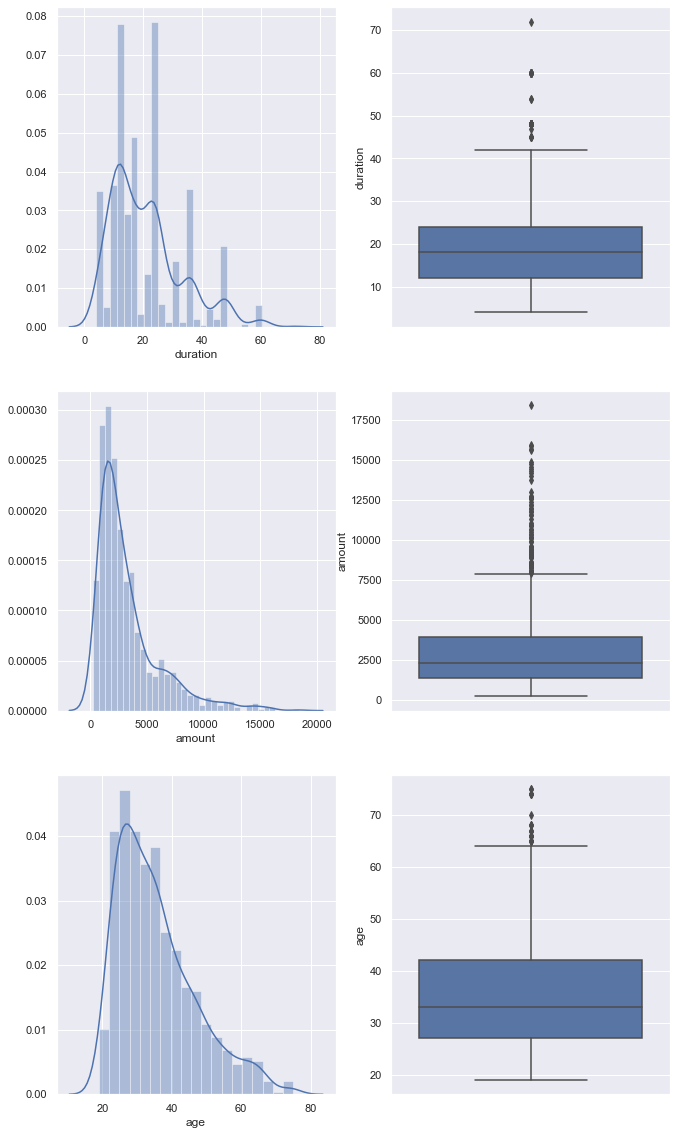

In [18]:
# Visualizing the distribution of the numerical data
plt.figure(figsize=(11, 20))
i = 0
for col in num_col:
    i=i+1
    plt.subplot(3,2,i)
    sns.distplot(data[col], norm_hist=True)
    i=i+1
    plt.subplot(3,2,i)
    sns.boxplot(data_copy[col], orient='v');

### In above graphs it's clear that the data is some what skwed and there are some outliers present

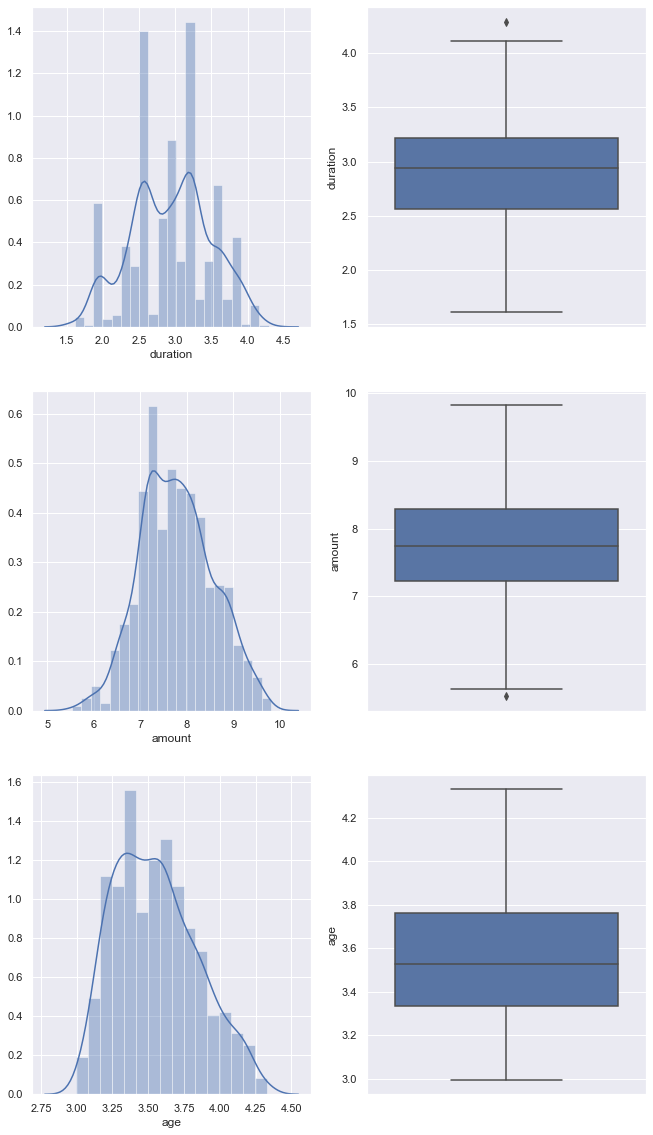

In [19]:
# fixing the sqewness and outliers using log function
plt.figure(figsize=(11, 20))
i = 0
for col in num_col:
    data_copy[col] = np.log1p(data_copy[col])
    i=i+1
    plt.subplot(3,2,i)
    sns.distplot(data_copy[col], norm_hist=True)
    i=i+1
    plt.subplot(3,2,i)
    sns.boxplot(data_copy[col], orient='v');

<AxesSubplot:>

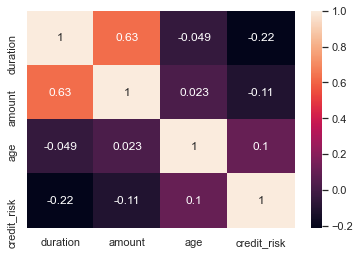

In [20]:
# visualizing the corelation between feature
sns.heatmap(data_copy.corr(), annot = True)

In [21]:
data_copy

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,2.944439,all credits at this bank paid back duly,car (used),6.956545,unknown/no savings account,<1 yr,<20,female : non-single or male : single,None,...,car or other,3.091042,none,for free,1,skilled employee/official,0 to 2,No,no,1
1,no checking account,2.302585,all credits at this bank paid back duly,others,7.937375,unknown/no savings account,1<=..<4 yrs,25<=..<35,male : married/widowed,None,...,unknown / no property,3.610918,none,for free,2-3,skilled employee/official,3 or more,No,no,1
2,..<0 DM,2.564949,no credits taken/all credits paid back duly,retraining,6.735780,..<100 DM,4<=..<7 yrs,25<=..<35,female : non-single or male : single,None,...,unknown / no property,3.178054,none,for free,1,unskilled - resident,0 to 2,No,no,1
3,no checking account,2.564949,all credits at this bank paid back duly,others,7.660585,unknown/no savings account,1<=..<4 yrs,20<=..<25,male : married/widowed,None,...,unknown / no property,3.688879,none,for free,2-3,unskilled - resident,3 or more,No,yes,1
4,no checking account,2.564949,all credits at this bank paid back duly,others,7.683404,unknown/no savings account,1<=..<4 yrs,<20,male : married/widowed,None,...,car or other,3.663562,bank,rent,2-3,unskilled - resident,0 to 2,No,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,3.218876,no credits taken/all credits paid back duly,furniture/equipment,7.594884,unknown/no savings account,1<=..<4 yrs,25<=..<35,male : married/widowed,None,...,unknown / no property,3.091042,none,for free,1,unskilled - resident,3 or more,No,no,0
996,no checking account,3.218876,no credits taken/all credits paid back duly,others,7.742402,unknown/no savings account,>=7 yrs,<20,male : married/widowed,co-applicant,...,unknown / no property,3.828641,none,rent,1,skilled employee/official,0 to 2,No,no,0
997,..>= 200 DM/salary for at least 1 year,3.091042,all credits at this bank paid back duly,others,9.447860,..>=1000 DM,>=7 yrs,<20,male : married/widowed,None,...,real estate,3.433987,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,Yes,no,0
998,..<0 DM,2.564949,no credits taken/all credits paid back duly,furniture/equipment,8.774777,..>=1000 DM,unemployed,25<=..<35,male : married/widowed,None,...,real estate,3.970292,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,Yes,no,0


In [22]:
train_data = data_copy[num_col[:]]
train_data

,duration,amount,age
0,2.944439,6.956545,3.091042
1,2.302585,7.937375,3.610918
2,2.564949,6.735780,3.178054
3,2.564949,7.660585,3.688879
4,2.564949,7.683404,3.663562
...,...,...,...
995,3.218876,7.594884,3.091042
996,3.218876,7.742402,3.828641
997,3.091042,9.447860,3.433987
998,2.564949,8.774777,3.970292


In [23]:
# one-hot-encoding on categorical features
for i in categorical_col:
    dum_col = pd.get_dummies(data_copy[i],drop_first=True)
    train_data = pd.concat([train_data,dum_col],axis=1)
train_data = pd.concat([train_data,data_copy['credit_risk']],axis=1)

In [24]:
train_data

,duration,amount,age,..>= 200 DM/salary for at least 1 year,0<=..<200 DM,no checking account,critical account/other credits elsewhere,delay in paying off in the past,existing credits paid back duly till now,no credits taken/all credits paid back duly,...,2-3,4-5,>= 6,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident,3 or more,Yes,yes,credit_risk
0,2.944439,6.956545,3.091042,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2.302585,7.937375,3.610918,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2.564949,6.735780,3.178054,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,2.564949,7.660585,3.688879,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1
4,2.564949,7.683404,3.663562,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.218876,7.594884,3.091042,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
996,3.218876,7.742402,3.828641,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
997,3.091042,9.447860,3.433987,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,2.564949,8.774777,3.970292,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [44]:
# split the data input and output
X = train_data.drop(columns='credit_risk')
Y = train_data['credit_risk']

In [45]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X.values, Y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 700
Before OverSampling, counts of label '0': 300 

After OverSampling, the shape of train_X: (1400, 54)
After OverSampling, the shape of train_y: (1400,) 

After OverSampling, counts of label '1': 700
After OverSampling, counts of label '0': 700


In [46]:
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split( X_train_res, y_train_res,test_size = 0.28, random_state= 355)

In [47]:
#instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(max_iter=400)
model.fit(x_train, y_train)

LogisticRegression(max_iter=400)

In [48]:
# check the accuracy on the training set
model.score(x_test, y_test)

0.727735368956743

In [49]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       181
           1       0.78      0.69      0.73       212

    accuracy                           0.73       393
   macro avg       0.73      0.73      0.73       393
weighted avg       0.73      0.73      0.73       393



In [50]:
#Traning the model without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7709923664122137

In [51]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       181
           1       0.81      0.76      0.78       212

    accuracy                           0.77       393
   macro avg       0.77      0.77      0.77       393
weighted avg       0.77      0.77      0.77       393



In [37]:
# as the accuracy is less
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,15,1),
    'min_samples_leaf' : range(1,15,1),
    'min_samples_split': range(1,15,1),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [38]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose=2)

In [39]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16464 candidates, totalling 82320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 5776 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 18768 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 36880 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 60240 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 82320 out of 82320 | elapsed:  1.8min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(1, 15)},
             verbose=2)

In [40]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 13,
 'min_samples_split': 2}

In [41]:
#Traning the model without doing any pre processing
clf_grid = DecisionTreeClassifier(criterion= 'gini',max_depth= 12, max_features= 'auto',
                             min_samples_leaf= 13,min_samples_split= 2)
clf_grid.fit(x_train,y_train)
print('test score->',clf_grid.score(x_test,y_test))
print('train score->',clf_grid.score(x_train,y_train))

test score-> 0.7353689567430025
train score-> 0.8669314796425025


In [42]:
predictions = clf_grid.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       181
           1       0.83      0.65      0.72       212

    accuracy                           0.74       393
   macro avg       0.75      0.74      0.73       393
weighted avg       0.75      0.74      0.73       393



In [52]:
#initialising the random forest classifier
rand_clf = RandomForestClassifier()
rand_clf.fit(x_train,y_train)
print('test score->',rand_clf.score(x_test,y_test))
print('train score->',rand_clf.score(x_train,y_train))

test score-> 0.8320610687022901
train score-> 1.0


In [53]:
predictions = rand_clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       181
           1       0.84      0.85      0.85       212

    accuracy                           0.83       393
   macro avg       0.83      0.83      0.83       393
weighted avg       0.83      0.83      0.83       393



In [45]:
# tuning hyperparameters, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : range(1,15,3),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,15,3),
    'min_samples_leaf' : range(1,10,3),
    'min_samples_split': range(1,10,3),
    'max_features' : ['auto','log2', 'sqrt']
}

In [46]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [47]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 2104 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 6750 out of 6750 | elapsed:   49.2s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15, 3),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': range(1, 10, 3),
                         'min_samples_split': range(1, 10, 3),
                         'n_estimators': range(1, 15, 3)},
             verbose=3)

In [48]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 13}

In [49]:
#initialising the random forest classifier
rand_clf_grid = RandomForestClassifier(criterion='entropy',max_depth=13, max_features='sqrt',
                                 min_samples_leaf=1,min_samples_split=7,n_estimators=13)
rand_clf_grid.fit(x_train,y_train)
print('test score->',rand_clf_grid.score(x_test,y_test))
print('train score->',rand_clf_grid.score(x_train,y_train))

test score-> 0.8015267175572519
train score-> 0.945382323733863


In [50]:
predictions = rand_clf_grid.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       181
           1       0.82      0.81      0.82       212

    accuracy                           0.80       393
   macro avg       0.80      0.80      0.80       393
weighted avg       0.80      0.80      0.80       393



In [51]:
from xgboost import XGBClassifier

In [52]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       181
           1       0.81      0.83      0.82       212

    accuracy                           0.80       393
   macro avg       0.80      0.80      0.80       393
weighted avg       0.80      0.80      0.80       393



In [54]:
grid_param = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

In [55]:
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [56]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 19.7min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [60]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 15,
 'n_estimators': 400,
 'reg_alpha': 1.2,
 'reg_lambda': 1.1,
 'subsample': 0.9}

In [61]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic',colsample_bytree=0.7,max_depth=15,n_estimators=400,reg_alpha=1.2,
 reg_lambda=1.1,subsample=0.9)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1.2, reg_lambda=1.1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       181
           1       0.83      0.85      0.84       212

    accuracy                           0.82       393
   macro avg       0.82      0.82      0.82       393
weighted avg       0.82      0.82      0.82       393



In [ ]:
data_copy.to_csv('pre_prossed.csv',index=False)

In [54]:
import joblib
filename = 'model.sav'
joblib.dump(rand_clf, filename)

['model.sav']

In [56]:
import joblib
model = joblib.load('model.sav')

In [29]:
pred = model.predict(x_test)

In [30]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [32]:
pred.replace(to_replace=[0,1],value=['Bad','Good'])

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [59]:
data = pd.read_csv('predection.csv')

In [60]:
data

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2


In [41]:
data.shape

(1000, 20)

In [42]:
data.to_csv('predection.csv',index=False)

In [63]:
model.n_features_

54